# Car Prices Prediction

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

In [219]:
cars = pd.read_csv ('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [220]:
cars.shape

(205, 26)

In [221]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [222]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# (1) Cleaning data

In [223]:
cars['CarName']=cars['CarName'].apply(lambda x:x.split(' ', 1)[0]) #فانكشن مهمة
cars.rename(columns = {'CarName':'CompanyName'}, inplace = True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# (2) Encoding Categorical data (Replacin` Values)

In [224]:
cleanup_nums = {"doornumber":     {"four": 4, "two": 2}}
cars=cars.replace(cleanup_nums)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [225]:
cars.isna().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [226]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [227]:
cars.CompanyName.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [228]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Visualizing data

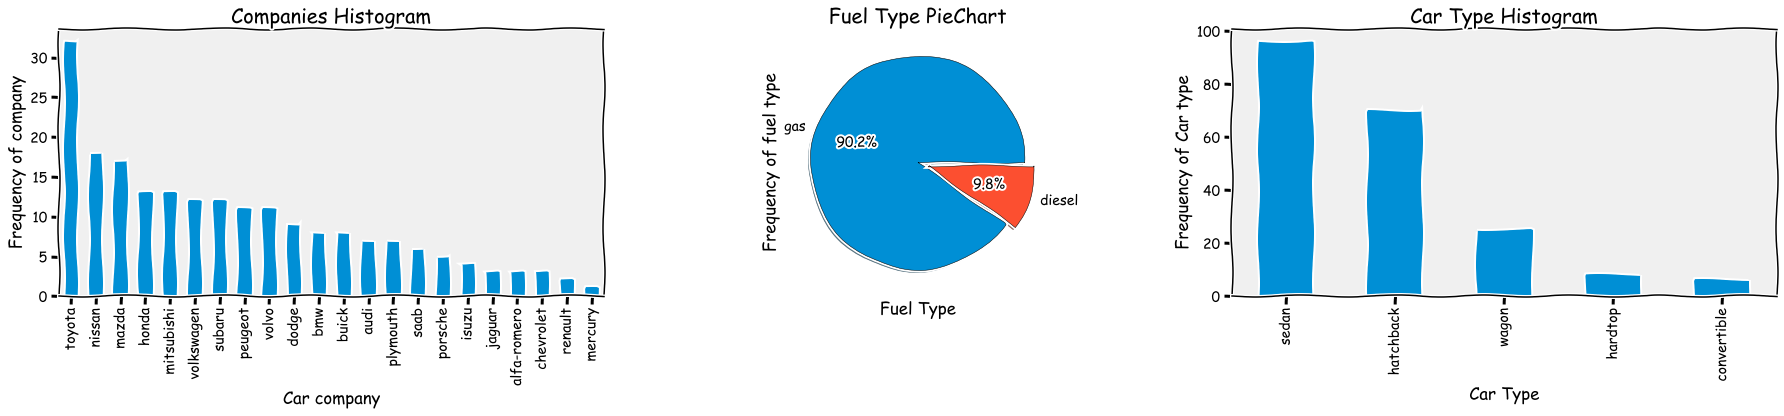

In [229]:
plt.figure(figsize=(25, 6))


explode=[0,0.1]
colors = ['#008fd5','#fc4f30']


plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot('pie',autopct='%1.1f%%',shadow = True ,explode=explode ,colors=colors ,wedgeprops={'edgecolor':'black'})
plt.title('Fuel Type PieChart')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')




plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.xkcd()

plt.show()

In [230]:
#Toyota seemed to be favored car company.
#Number of gas fueled cars are more than diesel.
#sedan is the top car type prefered.

In [231]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [232]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Linear Regression

In [233]:
x = cars.loc[:101,["symboling"]]
y = cars.loc[:101,["price"]]

x_test = cars.loc[102:,["symboling"]]
y_actual = cars.loc[102:,["price"]]

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
LinearRegression()

y_predicted = model.predict(x_test)
y_predicted

array([[15874.62088145],
       [15874.62088145],
       [ 9293.07976059],
       [ 9293.07976059],
       [13680.77384116],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [15874.62088145],
       [13680.77384116],
       [13680.77384116],
       [13680.77384116],
       [13680.77384116],
       [13680.77384116],
       [18068.46792174],
       [ 9293.07976059],
       [ 9293.07976059],
       [ 9293.07976059],
       [ 9293.07976059],
       [ 9293.07976059],
       [13680.77384116],
       [15874.62088145],
       [11486.92680088],
       [ 9293.07976059],
       [11486.92680088],
       [ 9293.07976059],
       [11486.92680088],
       [ 9293.07976059],
       [11486.92680088],
       [11486.92680088],
       [11486.92680088],
       [11486.92680088],
       [15874.62088145],


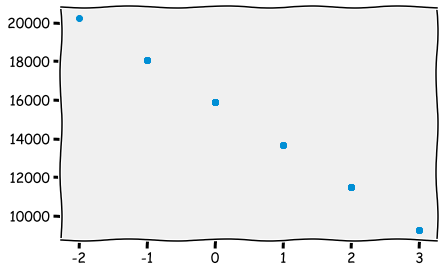

In [234]:
plt.scatter(x_test,y_predicted)
plt.show()

In [235]:
model.coef_

array([[-2193.84704029]])

In [236]:
model.intercept_

array([15874.62088145])

# Multi

In [237]:
#Variables for prediction of price

auto = cars[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price']]
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0


# Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable 

In [238]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
auto = pd.concat([auto, cyl_no], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)

drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], axis = 1, inplace = True)

In [239]:
xx=auto
yy=cars.price

from sklearn.model_selection import train_test_split

xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy,test_size=.3)
xx_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,five,four,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
157,95.7,166.3,64.4,2109,98,3.19,70,7198.000,0,1,...,0,0,1,0,0,1,0,0,0,1
163,94.5,168.7,64.0,2169,98,3.19,70,8058.000,0,1,...,0,0,0,1,0,0,1,0,0,1
148,96.9,173.6,65.4,2420,108,3.62,82,8013.000,0,1,...,0,0,0,0,0,0,0,1,0,1
27,93.7,157.3,63.8,2191,98,3.03,102,8558.000,0,1,...,0,0,1,0,0,0,1,0,1,1
111,107.9,186.7,68.4,3075,120,3.46,95,15580.000,0,1,...,0,0,0,1,0,0,1,0,0,1
166,94.5,168.7,64.0,2300,98,3.24,112,9538.000,0,1,...,0,0,0,1,0,1,0,0,0,1
9,99.5,178.2,67.9,3053,131,3.13,160,17859.167,1,0,...,0,0,0,0,0,1,0,0,1,1
153,95.7,169.7,63.6,2280,92,3.05,62,6918.000,0,1,...,0,0,1,0,0,0,0,1,0,1
158,95.7,166.3,64.4,2275,110,3.27,56,7898.000,0,1,...,0,0,1,0,0,0,1,0,0,0
112,107.9,186.7,68.4,3252,152,3.70,95,16900.000,0,1,...,0,0,0,1,0,0,1,0,1,0


In [240]:
yy_train

157     7198.000
163     8058.000
148     8013.000
27      8558.000
111    15580.000
166     9538.000
9      17859.167
153     6918.000
158     7898.000
112    16900.000
132    11850.000
122     7609.000
64     11245.000
28      8921.000
147    10198.000
125    22018.000
22      6377.000
194    12940.000
13     21105.000
70     31600.000
101    13499.000
71     34184.000
86      8189.000
2      16500.000
73     40960.000
102    14399.000
57     13645.000
8      23875.000
94      7299.000
174    10698.000
         ...    
184     7995.000
17     36880.000
54      7395.000
97      7999.000
108    13200.000
175     9988.000
172    17669.000
140     7603.000
116    17950.000
154     7898.000
123     8921.000
98      8249.000
115    16630.000
197    16515.000
3      13950.000
180    15690.000
33      6529.000
35      7295.000
143     9960.000
165     9298.000
179    15998.000
187     9495.000
167     8449.000
11     16925.000
204    22625.000
142     7775.000
84     14489.000
46     11048.0

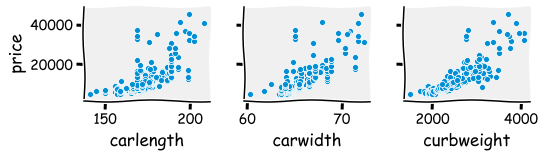

In [241]:
sns.pairplot(auto, x_vars=["carlength","carwidth","curbweight"],y_vars=["price"], diag_kind=None)

In [242]:
#import statsmodels.formula.api as sm 
#lr=sm.ols(formula = 'price ~ fuelt+asp+carb+drwh+wheelbase+carlength+carwidth+curbweight+eng_typ+cyl_no+enginesize+boreratio+horsepower', data=auto).fit()

# FeatureScaling

In [243]:
xxx = auto
yyy = cars.price

In [244]:
from sklearn.model_selection import train_test_split
xxx_train, xxx_test, yyy_train, yyy_test = train_test_split(xxx,yyy,test_size=.3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xxx_train_scale = sc.fit_transform(xxx_train)
xxx_test_scale = sc.transform(xxx_train)
xxx_test_scale

array([[-0.70875569, -0.76907997, -0.99935266, ..., -0.3423266 ,
        -0.52610428, -2.81735692],
       [-0.70875569, -0.76907997, -0.99935266, ..., -0.3423266 ,
        -0.52610428,  0.3549426 ],
       [-0.70875569, -0.73613257, -0.90936058, ..., -0.3423266 ,
        -0.52610428,  0.3549426 ],
       ...,
       [ 1.50532592,  0.99360616,  1.07046529, ..., -0.3423266 ,
        -0.52610428,  0.3549426 ],
       [ 0.26610113,  0.45821084,  0.39552465, ..., -0.3423266 ,
        -0.52610428,  0.3549426 ],
       [-0.70875569, -1.54334397, -1.08934475, ..., -0.3423266 ,
        -0.52610428,  0.3549426 ]])

In [245]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=4)
#model.fit(xxx_train_scale,yyy_train)
#KNeighborsClassifier()
#yyy_predict = model.predict(xxx_test_scale)
#yyy_predict

In [246]:
#z = auto
#c = cars.price
#from sklearn.model_selection import train_test_split
#z_train, z_test, c_train, c_test = train_test_split(z,c,test_size=.3)
#from sklearn.naive_bayes import GaussianNB
#GNB = GaussianNB()
#GNB.fit(z_train, c_train)
#GaussianNB()

In [247]:
#from sklearn.preprocessing import MinMaxScaler

In [248]:
#MNS = MinMaxScaler()
#xxx_train_MN= MNS.fit_transform(xxx_train)
#xxx_train_MN

# Before Creatig Elbow Plot

In [249]:
NewCars = cars[['CompanyName','citympg','price']]
NewCars.head()

,CompanyName,citympg,price
0,alfa-romero,21,13495.0
1,alfa-romero,21,16500.0
2,alfa-romero,19,16500.0
3,audi,24,13950.0
4,audi,18,17450.0


In [250]:
Q = NewCars.iloc[:,[1,2]]
Q.head()

,citympg,price
0,21,13495.0
1,21,16500.0
2,19,16500.0
3,24,13950.0
4,18,17450.0


In [251]:
W = NewCars.iloc[:,0]
W.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CompanyName, dtype: object

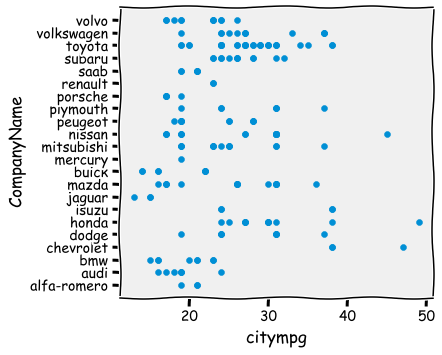

In [252]:
plt.figure(figsize =(5,5))
plt.scatter(cars.citympg,cars.CompanyName)
plt.xlabel('citympg')
plt.ylabel('CompanyName')
plt.show()

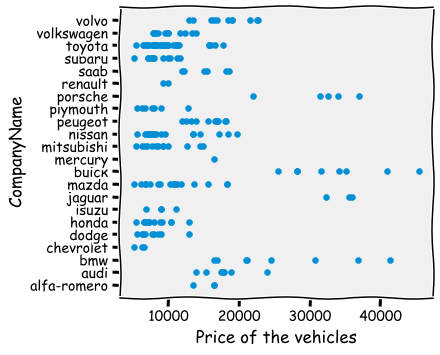

In [253]:
plt.figure(figsize =(5,5))
plt.scatter(cars.price,cars.CompanyName)
plt.xlabel('Price of the vehicles')
plt.ylabel('CompanyName')
plt.show()

# Scaling using standarization

In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Q)
scaled_Q = pd.DataFrame(scaler.transform(Q), columns= Q.columns)
scaled_Q

,citympg,price
0,-0.646553,0.027391
1,-0.646553,0.404461
2,-0.953012,0.404461
3,-0.186865,0.084485
4,-1.106241,0.523668
5,-0.953012,0.247610
6,-0.953012,0.556293
7,-0.953012,0.708125
8,-1.259470,1.329882
9,-1.412700,0.575011


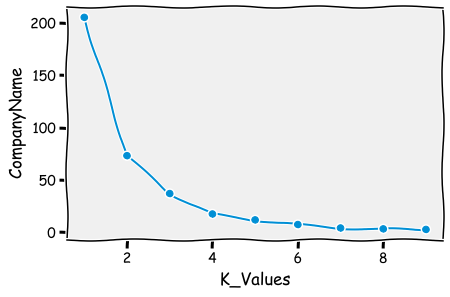

In [267]:
k_rng = range(1,10)
sse1 = []  #the sum of the squared Euclidean distances of each point to its closest centroid.
for k1 in k_rng:
    km1 = KMeans(n_clusters = k1)
    km1.fit(scaled_Q[['citympg']])
    sse1.append(km1.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('CompanyName')
plt.plot(k_rng, sse1, marker = 'o')
plt.show()

In [ ]:
#The optimum value for K in citympg attribute is 3

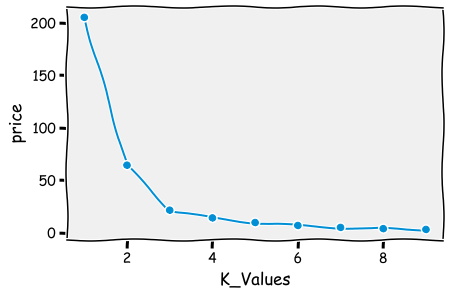

In [269]:
k_rng = range(1,10)
sse2 = []  
for k2 in k_rng:
    km2 = KMeans(n_clusters = k2)
    km2.fit(scaled_Q[['price']])
    sse2.append(km2.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('price')
plt.plot(k_rng, sse2, marker = 'o')
plt.show()

In [270]:
#The optimum value for K in price attribute is 3

# (Applying Clustering Algorithm)
I wanna find out which company should we go for, in terms of its price & citympg

In [278]:
#As the optimum value for K=3 for both attributes >> Create 3 clusters of classification.
km1 = KMeans(n_clusters=3)
km1.fit(scaled_Q[['citympg']])
W_predict = km1.predict(scaled_Q[['citympg']])
MC_cars = pd.concat([scaled_Q['citympg'],cars.CompanyName], axis=1)
MC_cars['Cluster(CompanyName vs citympg)'] = W_predict
MC_cars

,citympg,CompanyName,Cluster(CompanyName vs citympg)
0,-0.646553,alfa-romero,0
1,-0.646553,alfa-romero,0
2,-0.953012,alfa-romero,0
3,-0.186865,audi,2
4,-1.106241,audi,0
5,-0.953012,audi,0
6,-0.953012,audi,0
7,-0.953012,audi,0
8,-1.259470,audi,0
9,-1.412700,audi,0


Text(0, 0.5, 'CompanyName')

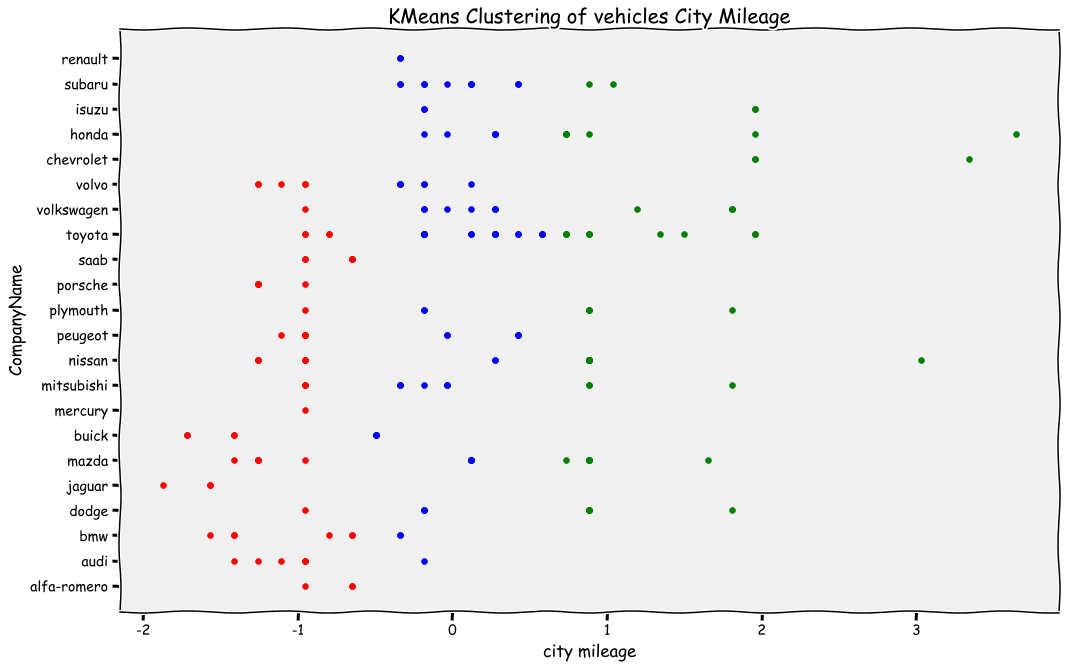

In [282]:
MC_cars1 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 0]
MC_cars2 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 1]
MC_cars3 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 2]

plt.subplots(figsize=([15,10]))
plt.scatter(MC_cars1['citympg'],MC_cars1['CompanyName'], color='red')
plt.scatter(MC_cars2['citympg'],MC_cars2['CompanyName'], color='green')
plt.scatter(MC_cars3['citympg'],MC_cars3['CompanyName'], color='blue')

plt.title('KMeans Clustering of vehicles City Mileage')
plt.xlabel('city mileage')
plt.ylabel('CompanyName')

In [283]:
#KMeans for price & CompanyName
km2 = KMeans(n_clusters=3)
km2.fit(scaled_Q[['citympg']])
W_predict = km1.predict(scaled_Q[['price']])
MC_cars = pd.concat([scaled_Q['price'],cars.CompanyName], axis=1)
MC_cars['Cluster(CompanyName vs citympg)'] = W_predict
MC_cars

,price,CompanyName,Cluster(CompanyName vs citympg)
0,0.027391,alfa-romero,2
1,0.404461,alfa-romero,2
2,0.404461,alfa-romero,2
3,0.084485,audi,2
4,0.523668,audi,2
5,0.247610,audi,2
6,0.556293,audi,2
7,0.708125,audi,1
8,1.329882,audi,1
9,0.575011,audi,2


Text(0, 0.5, 'CompanyName')

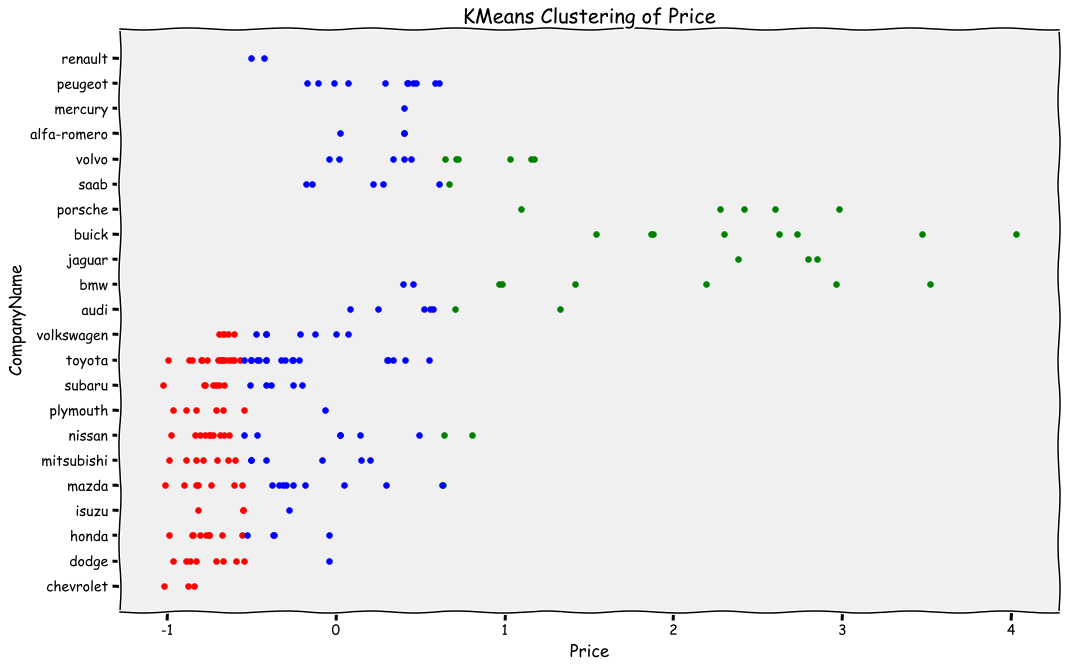

In [284]:
MC_cars1 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 0]
MC_cars2 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 1]
MC_cars3 = MC_cars[MC_cars['Cluster(CompanyName vs citympg)'] == 2]

plt.subplots(figsize=([15,10]))
plt.scatter(MC_cars1['price'],MC_cars1['CompanyName'], color='red')
plt.scatter(MC_cars2['price'],MC_cars2['CompanyName'], color='green')
plt.scatter(MC_cars3['price'],MC_cars3['CompanyName'], color='blue')

plt.title('KMeans Clustering of Price')
plt.xlabel('Price')
plt.ylabel('CompanyName')

# Creating Dendrogram

Text(0, 0.5, 'euclidean distance')

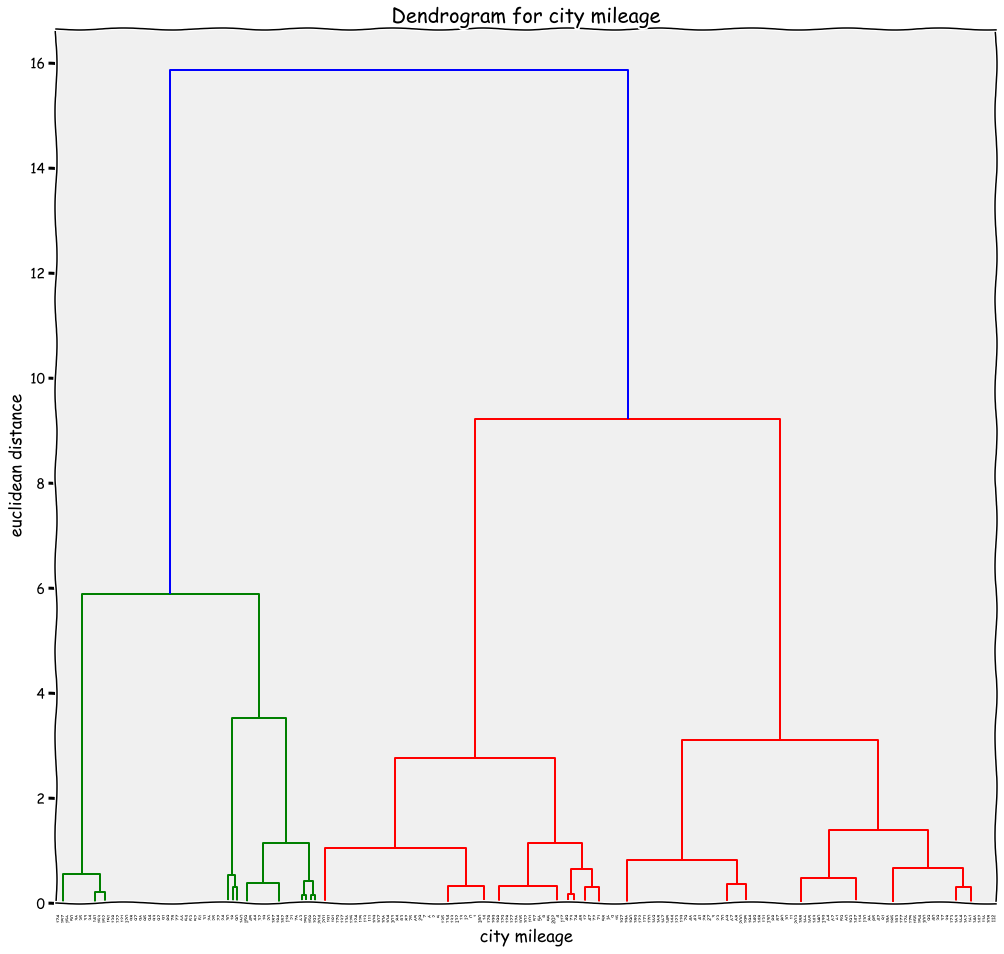

In [287]:
plt.figure(figsize = (15,15))
import scipy.cluster.hierarchy as sch
dendrograms = sch.dendrogram(sch.linkage(scaled_Q[['citympg']], method = 'ward')) #Ward's method is a criterion applied in hierarchical clustering

plt.title('Dendrogram for city mileage')
plt.xlabel('city mileage')
plt.ylabel('euclidean distance')

Text(0, 0.5, 'euclidean distance')

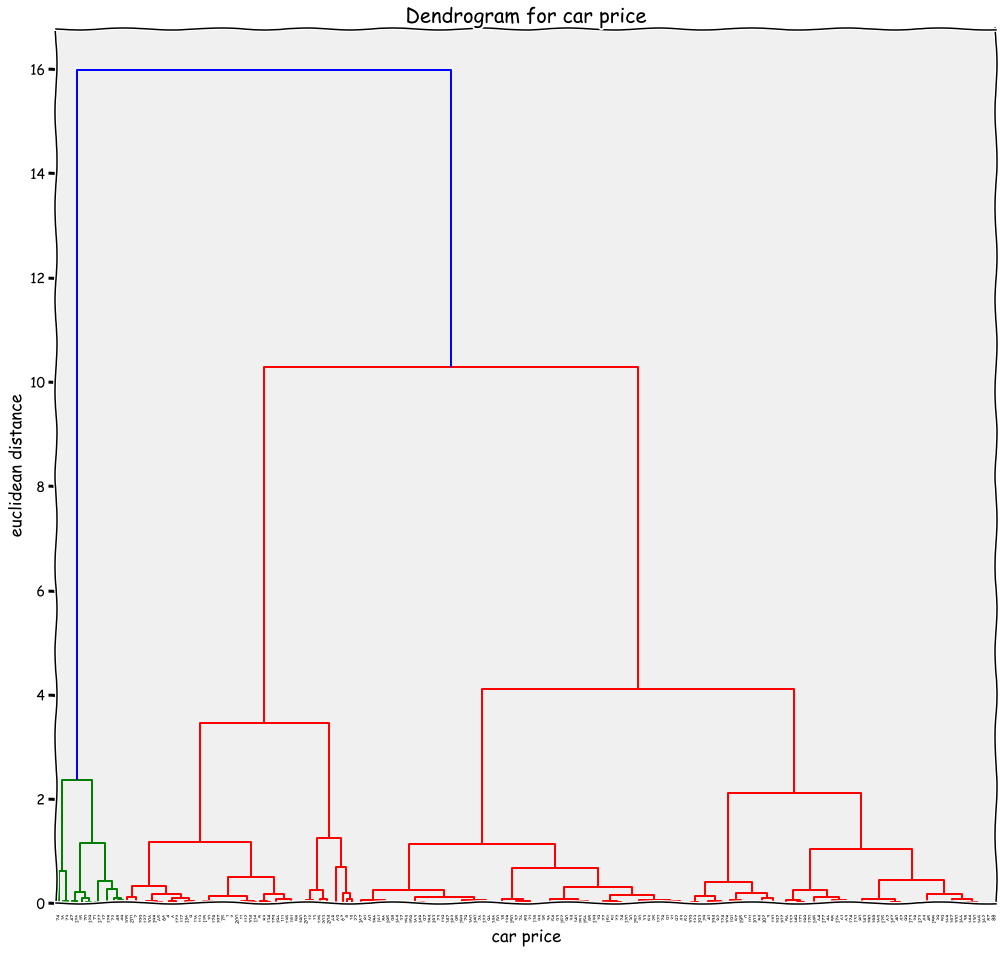

In [288]:
plt.figure(figsize = (15,15))
import scipy.cluster.hierarchy as sch
dendrograms = sch.dendrogram(sch.linkage(scaled_Q[['price']], method = 'ward')) 

plt.title('Dendrogram for car price')
plt.xlabel('car price')
plt.ylabel('euclidean distance')